In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
pd.options.display.max_rows=10

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df_train=pd.read_csv('../input/train.csv',nrows=1000000)

In [3]:
df_train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
999995,2014-09-13 21:44:38.0000001,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999996,2010-09-20 14:50:37.0000002,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1


In [4]:
df_train=df_train[(df_train.pickup_latitude>40)&(df_train.pickup_latitude<42)&(df_train.pickup_longitude>-74)&(df_train.pickup_longitude<-73)
                 &(df_train.dropoff_latitude>40)&(df_train.dropoff_latitude<42)&(df_train.dropoff_longitude>-74)&(df_train.dropoff_longitude<-73)]

In [5]:
df_train['passenger_count'].value_counts()

1    522972
2    110684
5     53402
3     32385
6     15916
4     15614
0      2686
Name: passenger_count, dtype: int64

In [11]:
df_train.loc[df_test['passenger_count']==0,['passenger_count','fare_amount']]

,passenger_count,fare_amount
314,0,34.0
566,0,4.9
678,0,6.5
1160,0,13.3
1935,0,10.1
...,...,...
997996,0,11.7
998203,0,3.3
998376,0,6.9
998515,0,8.9


In [25]:
df_train.loc[df_test['passenger_count']==0,['passenger_count','fare_amount']].mean().tolist()

[0.0, 8.809037868162688]

In [26]:
testlist=[]
testlist.append(df_train.loc[df_train['passenger_count']==0,['passenger_count','fare_amount']].mean().tolist())

In [27]:
testlist

[[0.0, 8.809037868162688]]

In [28]:
testlist.append(df_train.loc[df_test['passenger_count']==1,['passenger_count','fare_amount']].mean().tolist())

In [29]:
testlist.append(df_train.loc[df_test['passenger_count']==2,['passenger_count','fare_amount']].mean().tolist())

In [30]:
testlist.append(df_train.loc[df_test['passenger_count']==3,['passenger_count','fare_amount']].mean().tolist())

In [31]:
testlist.append(df_train.loc[df_test['passenger_count']==4,['passenger_count','fare_amount']].mean().tolist())

In [32]:
testlist

[[0.0, 8.809037868162688],
 [1.0, 11.22745894952454],
 [2.0, 11.814969717430829],
 [3.0, 11.510231920484404],
 [4.0, 11.733715525689433]]

In [33]:
testlist.append(df_train.loc[df_test['passenger_count']==5,['passenger_count','fare_amount']].mean().tolist())

In [34]:
testlist.append(df_train.loc[df_test['passenger_count']==6,['passenger_count','fare_amount']].mean().tolist())

In [35]:
testlist

[[0.0, 8.809037868162688],
 [1.0, 11.22745894952454],
 [2.0, 11.814969717430829],
 [3.0, 11.510231920484404],
 [4.0, 11.733715525689433],
 [5.0, 11.188919328564074],
 [6.0, 12.2527778826192]]

In [36]:
array_testlist=np.asarray(testlist)

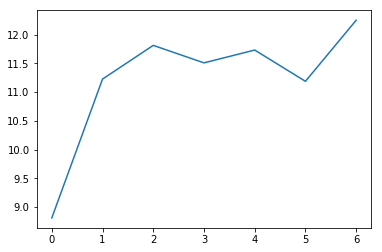

In [47]:
plt.plot(array_testlist[0:,0],array_testlist[0:,1]) # it shows that other than pasnumber=0 or 6,
#there isn't a significant impact on fare, but better to build separate models for each

In [23]:
testlist[1]

passenger_count     1.000000
fare_amount        11.227459
dtype: float64

In [24]:
testlist[1][1]

11.22745894952454

In [10]:
df_test.iloc[df_test['passenger_count']==0,[1,7]]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [50]:
df_test['Manha_dist']=np.absolute(df_test['pickup_latitude']-df_test['dropoff_latitude'])+np.absolute(df_test['pickup_longitude']-df_test['dropoff_longitude'])

In [51]:
df_test

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Manha_dist
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.011742
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.107481
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.019212
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.029386
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.027194
...,...,...,...,...,...,...,...,...,...
999995,2014-09-13 21:44:38.0000001,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1,0.027996
999996,2010-09-20 14:50:37.0000002,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2,0.000000
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5,0.026036
999998,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1,0.019845


(array([1.36933e+05, 4.73433e+05, 2.07257e+05, 7.67980e+04, 3.33260e+04,
        2.06730e+04, 1.49280e+04, 8.71000e+03, 4.43500e+03, 1.04230e+04,
        3.65300e+03, 6.60000e+03, 7.00000e+02, 4.51000e+02, 3.35000e+02,
        2.85000e+02, 2.38000e+02, 1.80000e+02, 1.08000e+02]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 <a list of 19 Patch objects>)

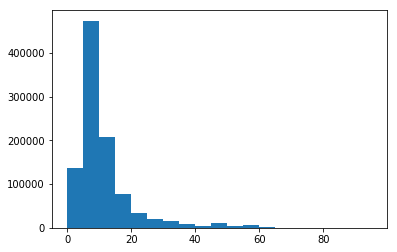

In [54]:
plt.hist(df_test['fare_amount'],bins=range(0,100,5))

In [62]:
df_test['dropoff_longitude'].sort_values()

436233   -3383.296608
688685   -1718.117653
269695   -1329.621332
174356   -1251.195890
967162    -740.066667
             ...     
524834            NaN
574023            NaN
580338            NaN
794694            NaN
895400            NaN
Name: dropoff_longitude, Length: 1000000, dtype: float64